### EDA

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nlp import preprocessing as pp
import nltk

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)
print("imported sucessfully")

imported sucessfully


#### Loading the Cambridge Readability Data Frame

In [63]:
df = pd.read_csv('data/cefr_readings.csv')

In [64]:
df.head()

,documents,cefr_level
0,The Long Night This is David Reilly's first bo...,A2
1,Most house burglaries happen between 2 p.m. an...,A2
2,One very famous place for tourists in London i...,A2
3,To: All staff Subject: Holidays From: D Brown ...,A2
4,Canada Geese are large blue and white birds. W...,A2


#### Break the Data Frame into pieces sentence-wise

In [65]:
sent_df = pp.get_sentences(df, 'documents', 'cefr_level')

In [66]:
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,The Long Night This is David Reilly's first book.,10,3.90,A2,0
1,David became a writer after teaching English f...,10,5.30,A2,0
2,"Maha is a nurse in northern Australia, where s...",14,4.29,A2,0
3,One day a baby is so ill that Maha has to driv...,22,3.23,A2,0
4,They have a lot of problems getting there and ...,19,4.47,A2,0
...,...,...,...,...,...
9532,It seems that a bunch of scientists are gettin...,30,4.63,C2,330
9533,Sure we all know its the age-old quest for kno...,23,4.26,C2,330
9534,But what these guys want to know is why we wan...,31,3.42,C2,330
9535,"Surely, it's more important to know whether wh...",28,4.18,C2,330


In [67]:
sentence_df.dtypes

text              object
num_of_words       int64
avg_len_words    float64
level             object
doc_id             int64
dtype: object

In [68]:
# checking for null values
sentence_df.isna().sum()

text             0
num_of_words     0
avg_len_words    0
level            0
doc_id           0
dtype: int64

#### Examine the length of the readings by level: 

### The chart below show the sum of number of words and length of the words per document

In [69]:
sentence_df.groupby(['level', 'doc_id']).sum()

text  num_of_words  \
level doc_id                                                                    
A2    0       The Long Night This is David Reilly's first bo...           186   
      1       Most house burglaries happen between 2 p.m. an...           196   
      2       One very famous place for tourists in London i...           116   
      3       To: All staff Subject: Holidays From: D Brown ...           110   
      4       Canada Geese are large blue and white birds.Wh...           197   
...                                                         ...           ...   
C2    326     Some time ago, a website highlighted the risks...           775   
      327     A course at the Bamboo Bike Club, run by engin...           885   
      328     The two sisters kept Lily's driving a secret f...           950   
      329     I have never begun a novel with more misgiving...           780   
      330     The transfer to London from Stratford of an ex...           466   

              avg_len_words  
level doc_id                 
A2    0               46.41  
      1               50.81  
      2               42.32  
      3               30.68  
      4               66.02  
...                     ...  
C2    326            184.16  
      327            210.02  
      328            262.66  
      329            118.86  
      330            100.64  

[331 rows x 3 columns]

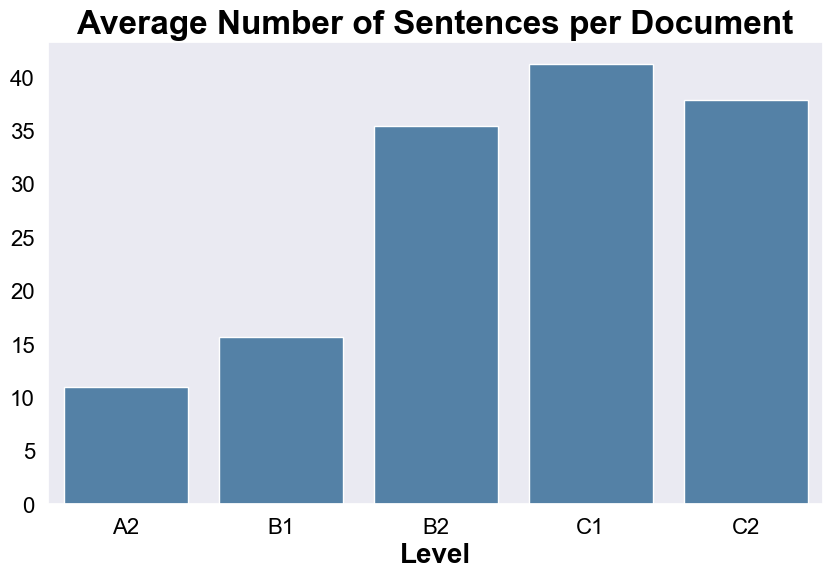

In [70]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'avg_number_sentences': avg})

font = {
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Average Number of Sentences per Document', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

In [71]:
avg_sentences = avg.tolist()
levels = ['A2', 'B1', 'B2', 'C1', 'C2']
x = range(5)

In [72]:
avg_sentences

[10.984375,
 15.666666666666666,
 35.45070422535211,
 41.23880597014925,
 37.88405797101449]

<function matplotlib.pyplot.show(close=None, block=None)>

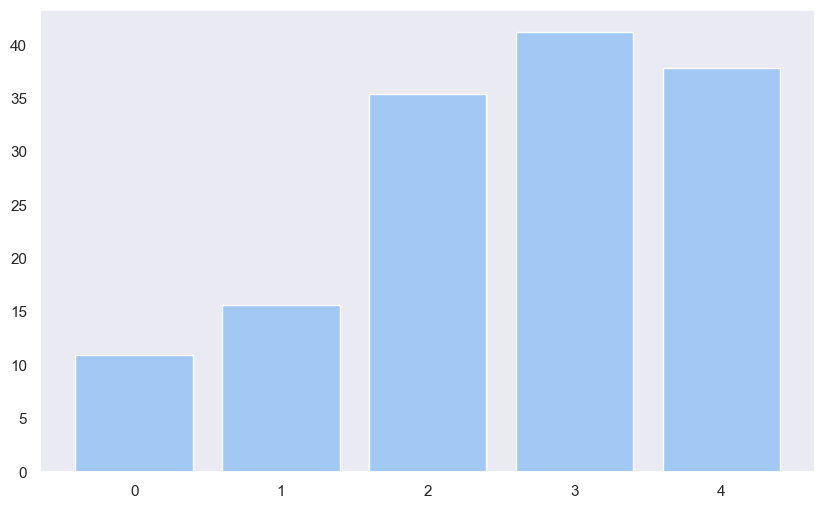

In [73]:
plt.bar(x, avg_sentences)
plt.show

In [74]:
sentence_df.columns

Index(['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'], dtype='object')

## average number of words per text for each unique value in the 'level' column in the sentence_df

In [75]:
avg = sentence_df.groupby(['level']).sum()['num_of_words'] / sentence_df.groupby(['level']).count()['text']
avg

level
A2    12.896159
B1    17.441489
B2    17.737783
C1    18.955121
C2    20.164881
dtype: float64

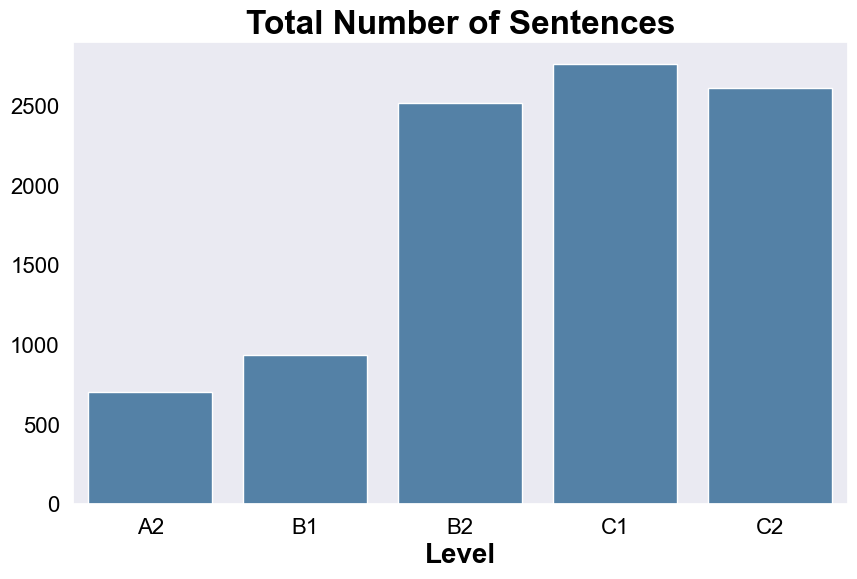

In [76]:
avg = sentence_df.groupby(['level']).count()['text']

df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg})

font = {
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Total Number of Sentences', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

In [77]:
print(sentence_df['num_of_words'].dtype)

int64


### average number of words per document versus the average words length

In [78]:
sns.set_theme(style="dark", font_scale=1.85)

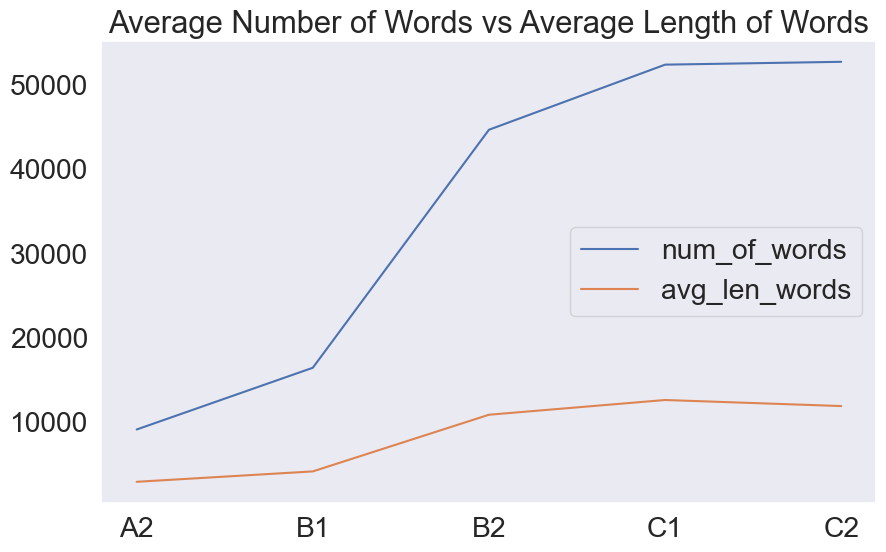

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
word_data = sentence_df.groupby(['level']).sum()[['num_of_words', 'avg_len_words']]
plt.plot(word_data)
plt.title(label='Average Number of Words vs Average Length of Words')
plt.legend(word_data.columns, loc="center right")
plt.show()

In [81]:
# Reload the data
df = pd.read_csv('data/cefr_readings.csv')

In [82]:
df.cefr_level

0      A2
1      A2
2      A2
3      A2
4      A2
       ..
326    C2
327    C2
328    C2
329    C2
330    C2
Name: cefr_level, Length: 331, dtype: object

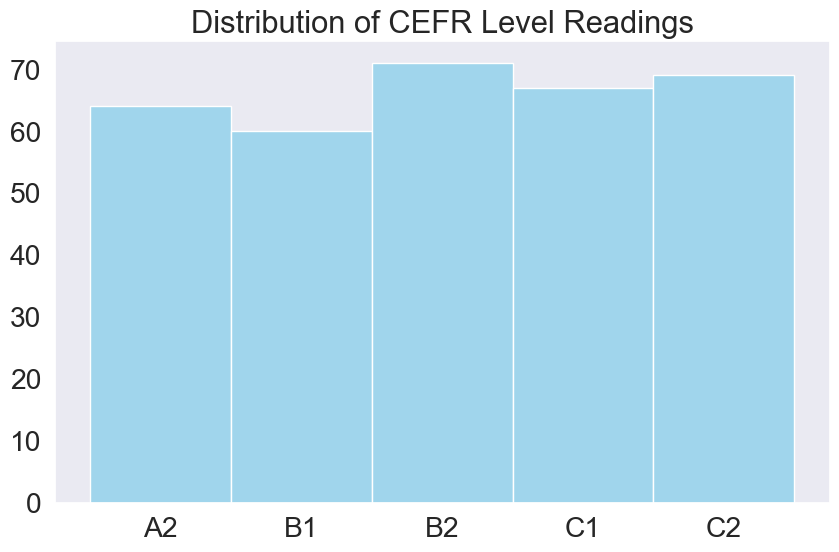

In [83]:
sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
sns.set_theme(style="dark", font_scale=1.85)
plt.xlabel("")
plt.ylabel("")
plt.show()
# plt.hist(df.cefr_level)
# plt.title('Distribution of CEFR Level Readings');

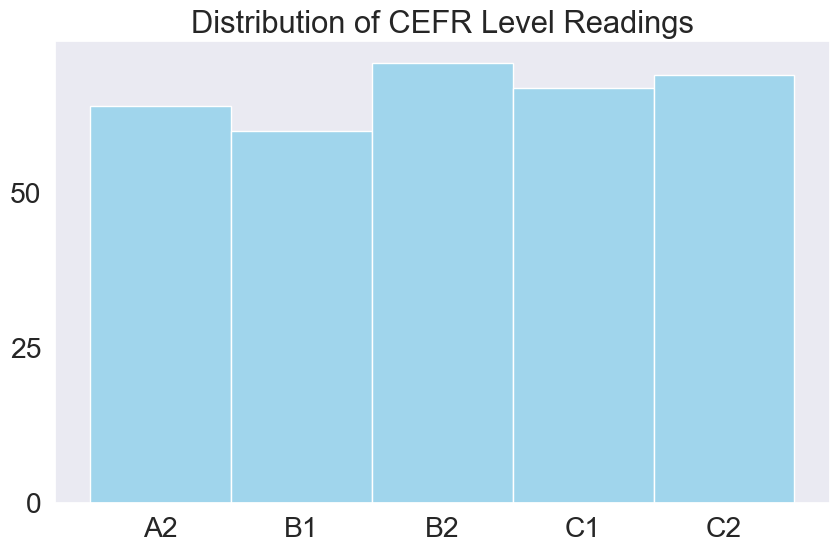

In [84]:
plt.close('all')
sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
sns.set_theme(style="dark", font_scale=4)
plt.xlabel("")
plt.ylabel("")
plt.show()

## More Exploratory Data Analysis on combined Cambridge and One-Stop Data Sets

In [86]:
sentence_df = pp.preprocess_all(sentence_df, 'text')
stats = pp.get_tokenized_word_stats(df, 'documents')

In [87]:
df_stats = pd.DataFrame.from_records(stats, columns =['total_words', 'total_sentences', 'avg_sent_len', 'max_sent_len', 'min_sent_len'])
df_stats['avg_sent_len'] = round(df_stats.avg_sent_len, 2)
df_stats

,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,186,11,16.91,35,10
1,196,12,16.33,23,6
2,116,10,11.60,19,6
3,110,8,13.75,35,1
4,197,16,12.31,23,5
...,...,...,...,...,...
326,775,40,19.38,48,1
327,885,47,18.83,56,3
328,950,62,15.32,47,2
329,780,30,26.00,55,8


In [88]:
data = pd.merge(df, df_stats, left_index=True, right_index=True) # df.join(df_stats) is the same: AN INNER JOIN
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,The Long Night This is David Reilly's first bo...,A2,186,11,16.91,35,10
1,Most house burglaries happen between 2 p.m. an...,A2,196,12,16.33,23,6
2,One very famous place for tourists in London i...,A2,116,10,11.60,19,6
3,To: All staff Subject: Holidays From: D Brown ...,A2,110,8,13.75,35,1
4,Canada Geese are large blue and white birds. W...,A2,197,16,12.31,23,5
...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,775,40,19.38,48,1
327,"A course at the Bamboo Bike Club, run by engin...",C2,885,47,18.83,56,3
328,The two sisters kept Lily's driving a secret f...,C2,950,62,15.32,47,2
329,I have never begun a novel with more misgiving...,C2,780,30,26.00,55,8


<Axes: xlabel='avg_sent_len', ylabel='Density'>

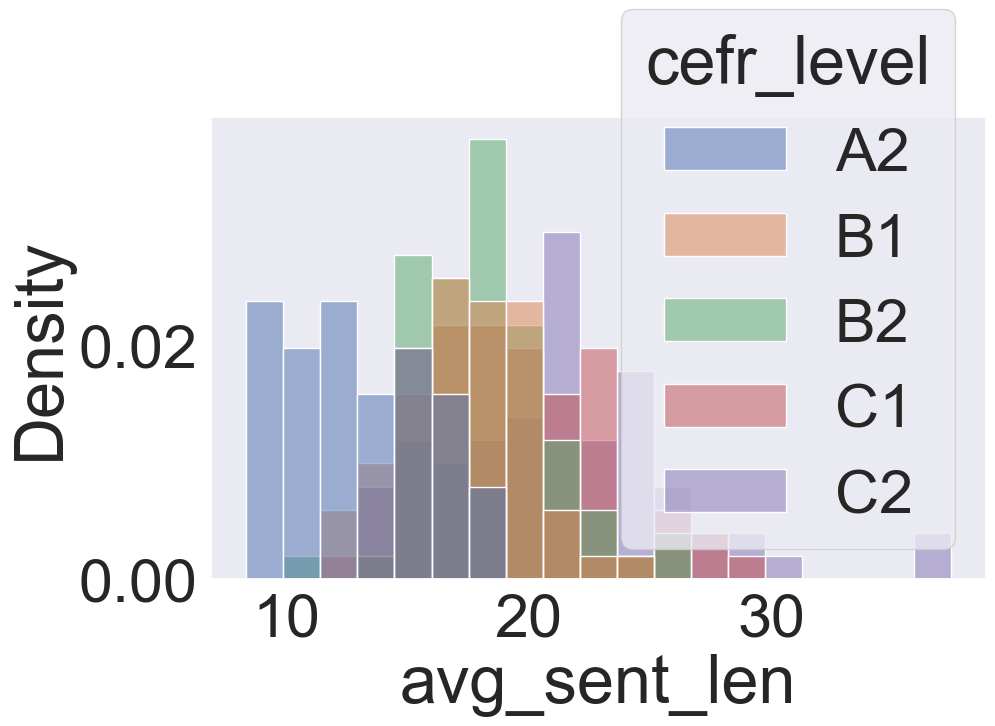

In [92]:
sns.histplot(data=data, x='avg_sent_len', hue='cefr_level', stat="density")


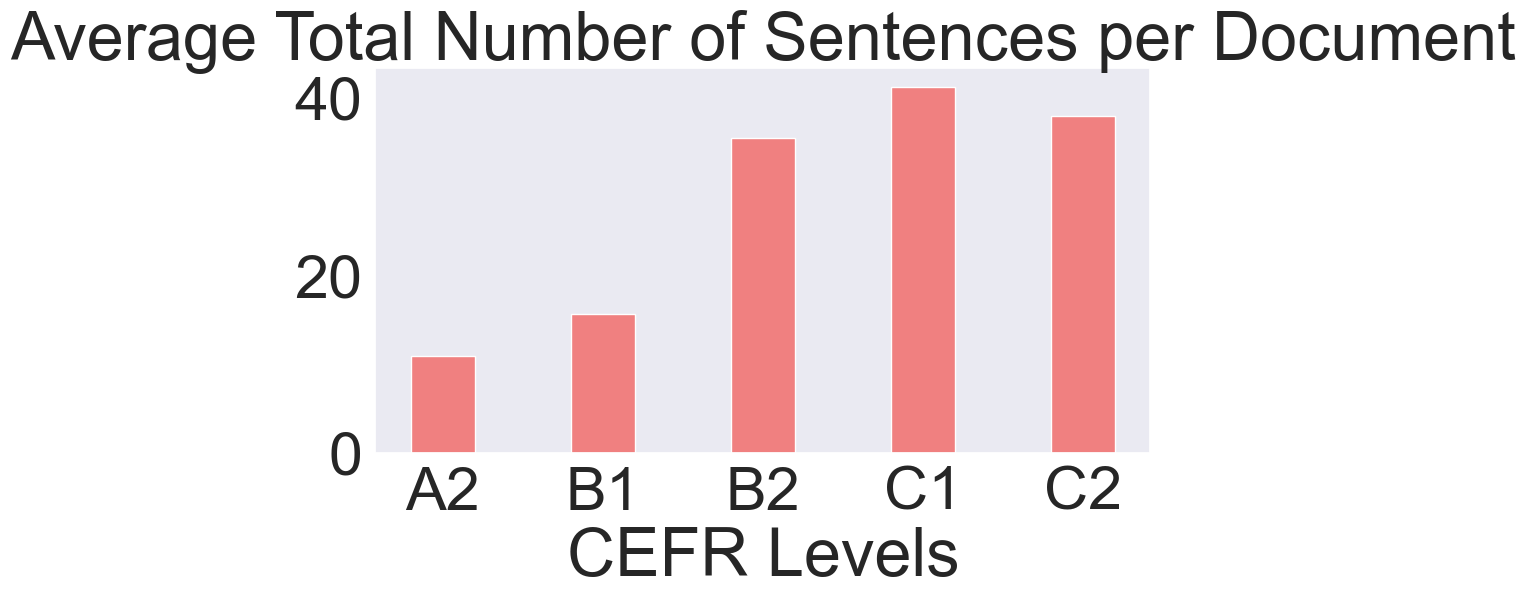

In [93]:
numb = data.groupby('cefr_level')['total_sentences'].mean().tolist()
num_d = {'A2': numb[0], 'B1': numb[1], 'B2': numb[2], 'C1': numb[3], 'C2': numb[4]}
num_d
levels = list(num_d.keys())
words = list(num_d.values()) 
fig = plt.figure(figsize = (10, 5))
plt.bar(levels, words, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("CEFR Levels")
plt.title("Average Total Number of Sentences per Document")
plt.show()

In [94]:
levels = data.groupby('cefr_level')['total_words'].mean().index.tolist()
levels

['A2', 'B1', 'B2', 'C1', 'C2']

In [95]:
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,The Long Night This is David Reilly's first bo...,A2,186,11,16.91,35,10
1,Most house burglaries happen between 2 p.m. an...,A2,196,12,16.33,23,6
2,One very famous place for tourists in London i...,A2,116,10,11.60,19,6
3,To: All staff Subject: Holidays From: D Brown ...,A2,110,8,13.75,35,1
4,Canada Geese are large blue and white birds. W...,A2,197,16,12.31,23,5
...,...,...,...,...,...,...,...
326,"Some time ago, a website highlighted the risks...",C2,775,40,19.38,48,1
327,"A course at the Bamboo Bike Club, run by engin...",C2,885,47,18.83,56,3
328,The two sisters kept Lily's driving a secret f...,C2,950,62,15.32,47,2
329,I have never begun a novel with more misgiving...,C2,780,30,26.00,55,8


<Axes: xlabel='total_words', ylabel='Count'>

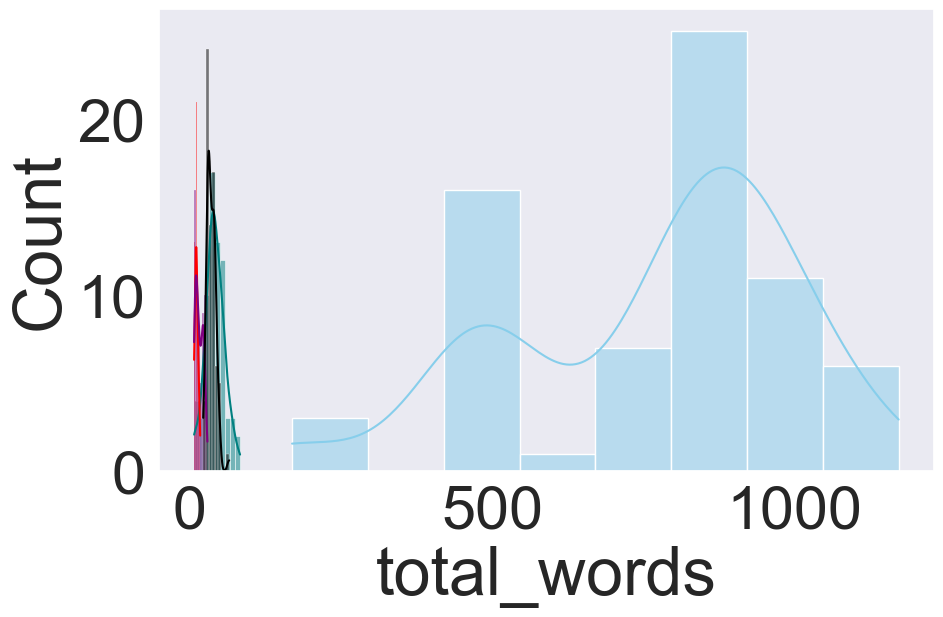

In [103]:
def multi_plotter(data, filter_col, plot_col, plot_label):
    sns.set_theme(style="dark")

    fig, axs = plt.subplots(2, 3, figsize=(12,8), sharey='row')
    levels = data.groupby(filter_col)[plot_col].mean().index.tolist()


    for i, level in enumerate(levels):
        if i in range(3):
            j = 0
        else:
            j = 1
            i = i - 2
        if level[0] == 'C':
            colour = 'skyblue'
        elif level[0] == 'B':
            colour = 'red'
        else:
            colour = 'teal'        


        plot_data = data[data[filter_col] == level][plot_col]

        axs[j, i].hist(plot_data, color=colour)
        axs[j, i].set_title(label=level)
        axs[j, i].set_xlabel(plot_label)
        axs[j, i].set_ylabel('')

    axs[1, 0].set_facecolor('white')
    axs[1, 0].set_xticklabels([])
    axs[1, 0].set_yticklabels([])    

    fig.tight_layout()
    plt.show()


sns.histplot(data=data[data.cefr_level == 'C2']['total_words'], color="skyblue", label="C2", kde=True)
sns.histplot(data=data[data.cefr_level == 'C1']['total_sentences'], color="teal", label="C2", kde=True)
sns.histplot(data=data[data.cefr_level == 'A2']['total_sentences'], color="red", label="A2", kde=True)
sns.histplot(data=data[data.cefr_level == 'B1']['total_sentences'], color="purple", label="B1", kde=True)
sns.histplot(data=data[data.cefr_level == 'B2']['total_sentences'], color="black", label="B2", kde=True)

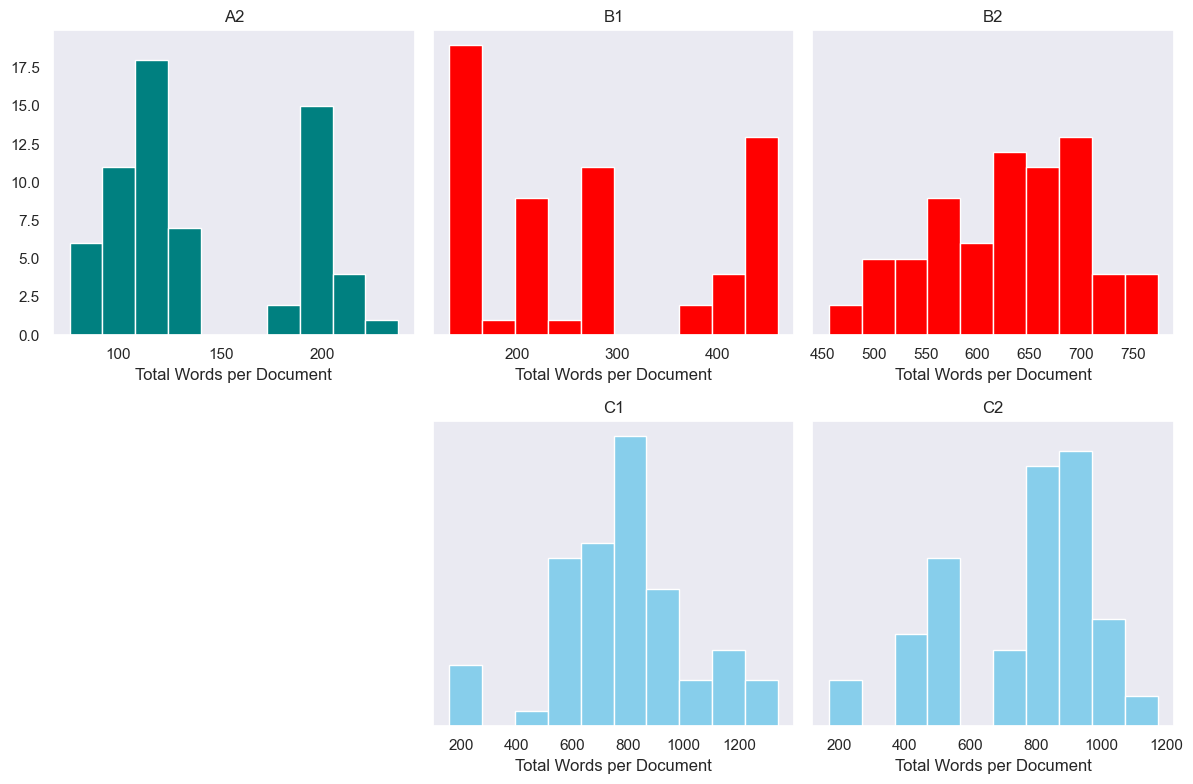

In [104]:
multi_plotter(data, 'cefr_level', 'total_words', 'Total Words per Document')

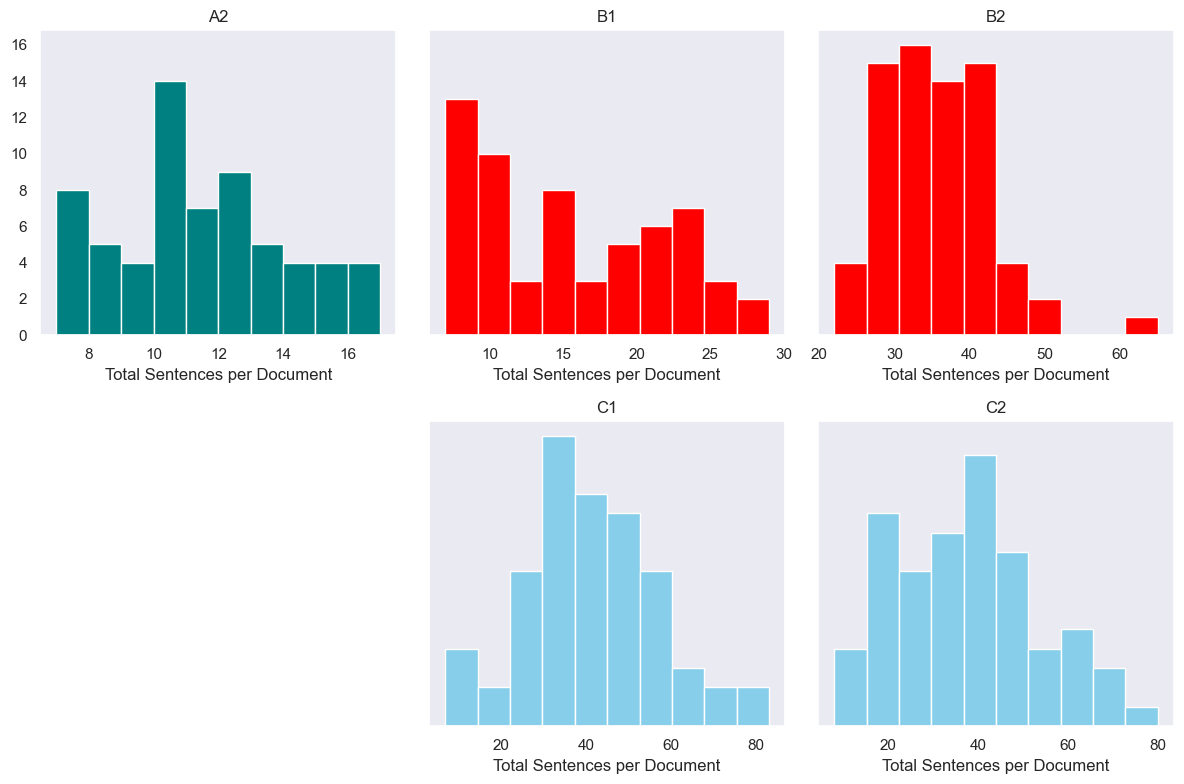

In [105]:
multi_plotter(data, 'cefr_level', 'total_sentences', 'Total Sentences per Document')

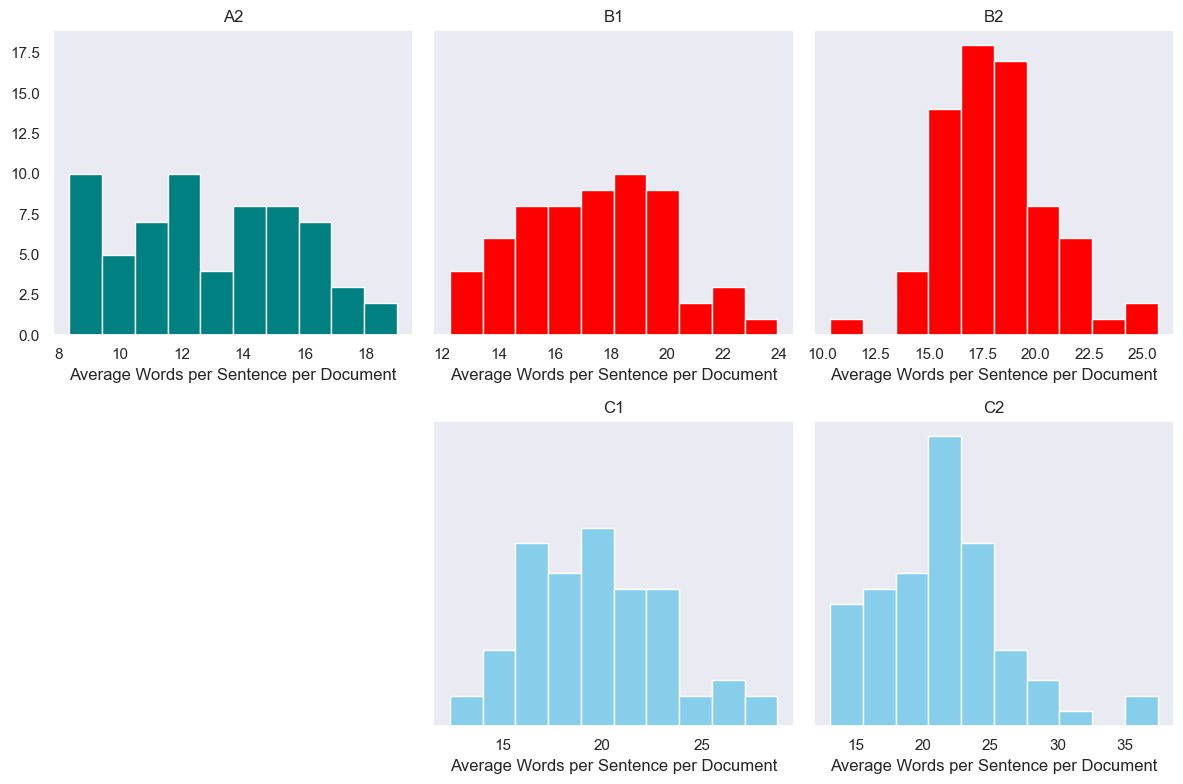

In [106]:
multi_plotter(data, 'cefr_level', 'avg_sent_len', 'Average Words per Sentence per Document')